In [9]:
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data
import warnings
warnings.filterwarnings("ignore")
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


## Data Acquisition
1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables 
- Would you recommend rescaling the data based on these statistics?

In [10]:
#print the first 3 rows
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [11]:
#print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [12]:
#print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [13]:
#print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [14]:
#print the summary statistics for each of the numeric variables 
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [15]:
#Would you recommend rescaling the data based on these statistics?

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables

In [16]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes


In [17]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)

In [18]:
#print the number of rows of your original dataframe
df_excel.shape[0]

7049

In [19]:
#print the first 5 column names
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [20]:
#print the column names that have a data type of object
df_excel.dtypes[df_excel.dtypes == object]

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

In [21]:
#compute the range for each of the numeric variables
(df_excel[['monthly_charges', 'total_charges']].max()) - (df_excel[['monthly_charges', 'total_charges']].min())

monthly_charges     100.5
total_charges      8666.0
dtype: float64

3. Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [22]:
#Step 1: Assign our Google Sheet share url to a variable
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [23]:
#Step 2: Use the replace method to modify our Google Sheet share url to be a csv export url
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [24]:
#Step 3: Use read_csv() method to create our DataFrame
df_google = pd.read_csv(csv_export_url)

In [25]:
#print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [26]:
#print the number of rows and columns
df_google.shape

(891, 12)

In [27]:
#print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
#print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
#print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
#print the unique values for each of your categorical variables
df_google.Sex.value_counts(), df_google.SibSp.value_counts(), df_google.Pclass.value_counts(), df_google.Survived.value_counts()

(male      577
 female    314
 Name: Sex, dtype: int64,
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64,
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 0    549
 1    342
 Name: Survived, dtype: int64)

# Data Preparation 

Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name.

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import acquire
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [33]:
#Use the function defined in acquire.py to load the iris data
df = acquire.get_iris_data()
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [35]:
#Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id', 'measurement_id']

df = df.drop(columns=cols_to_drop)

In [36]:
#other ways to drop species_id and measurement_id columns

#df = df.drop(['species_id', measurement_id], axis=1)
#df.drop(columns=['species_id', measurement_id], inplace=True)

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
#Rename the species_name column to just species.
df = df.rename(columns={'species_name': 'species'})

#or df.rename(columns={'species_name': 'species'}, inplace=True)

In [39]:
df.head()

#you can also check by doing :
# df.columns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
#Create dummy variables of the species name.

df_dummies = pd.get_dummies(df.species, drop_first=True)
df_dummies.head() 
#converting categories to separate colunns w/ a 0 or 1(bools)

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [41]:
#add dummies to df
df = pd.concat([df, df_dummies], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [42]:
#other way for creating dummy variables of the species name:
dummies = pd.get_dummies(df[['species']], drop_first=True)

#drop_first goes through different classes of species
#we know the 3 species so if we don't see a 1 in versicolor or virginica, then we know it must be setosa
#algorithm sees that the 3rd column is redundant as well

#avoids having so many columns in our dataframe


# *remember Double brackets = Dataframe and Single brackets = Series

# double brackets [['species']] --> shows the species_flower_name in table
# single brackets ['species'] --> only shows the flower name


df = pd.concat([df, dummies], axis=1)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0,0,0


In [43]:
#Create a function named prep_iris that accepts the untransformed iris data, 
#and returns the data with the transformations above applied.

#prep self with clean data:
def clean_iris(df):
    '''
    clean_iris will take one argument df, a pandas dataframe, anticipated to be the iris dataset
    and will remove species_id and measurement_id columns,
    rename species_name to species
    encode species into two new columns
    
    return: a single pandas dataframe with the above operations performed
    '''
        # drop and rename columns
    df=df.drop(['species_id', 'measurement_id'], axis=1)
    
        # create dummy columns for species
    df.rename(columns={'species_name': 'species'}, inplace=True)
    
        # add dummy columns to df
    dummies = pd.get_dummies(df[['species']], drop_first=True)
    
    return pd.concat([df, dummies], axis=1)

In [44]:
def prep_iris(df):
    '''
    prep_iris will take one argument df, a pandas dataframe, anticipated to be the iris dataset
    and will remove species_id & measurement_id columns,
    rename species_name to species,
    encode species into two new columns
    
    perform a train, validate, test split
    
    return: three pandas dataframes: train, validate, test
    '''
    df = clean_iris(df)
    
    # 20% test, 80% train_validate
    #splitting into two groups, (train+validate) and test group
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.species)
    
    # then of the 80% train_validate: 30% validate, 70% train. 
    #next splitting the (train+validate) into respective groups
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=123, stratify=train_validate.species)
    
    return train, validate, test


In [45]:
#Notes:

#referencing in notebook, we already have df in our notebook
#when transalating in own script (vs code) it's not gonna recognize unless we run acquire
#so put df as argument

#our df is reassign to clean_iris(df)
#stratify = telling sklearn that is roughly the target so we want it to be as balanced as possible
#random state can be any number

#train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
                                        #this can be changed to train_size = 0.7 (inverse)

In [46]:
#then put above functions into it's own script (prepare.py)

#in new script, do imports again

#and copy above functions clean_iris and prep_iris into vs code

In [47]:
#test it out
import prepare

In [48]:
#start from scratch with original dataframe to test and make sure we just undid everything we did previously
df = acquire.get_iris_data()

df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [49]:
#re-do steps by calling single function in one step:
train, validate, test = prepare.prep_iris(df)

In [50]:
#check veracity (accuracy)
train.head() 

#note: species is still in there so we might want to remove that in the future

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


## Data Exploration
Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable.

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this. 
- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
- What is your takeaway from this statistical testing?

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [51]:
#Use the iris dataset.
iris_df = clean_iris(df)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [52]:
#Split your data into train, validate, and test samples.
train_validate, test = train_test_split(iris_df, test_size=.2, 
                                        random_state=123,
                                        stratify=iris_df.species)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,
                                   stratify=train_validate.species)
#need to stratify the dataset based on the class values (target variable)

iris_df.shape, train.shape, validate.shape, test.shape

((150, 7), (84, 7), (36, 7), (30, 7))

In [53]:
print('overall shape of dataframe:', iris_df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

overall shape of dataframe: (150, 7)
train: (84, 7)
validate: (36, 7)
test: (30, 7)


In [54]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [55]:
#Create a swarmplot using a melted dataframe of all your numeric variables. 
#The x-axis should be the variable name, the y-axis the measure. 
#Add another dimension using color to represent species. 
#Document takeaways from this visualization.

#step 1: drop dummy vars to set up for next problem
train = train.drop(columns=['species_versicolor', 'species_virginica'])
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [56]:
#step 2: get melted df of all numeric variables
train_melt = train.melt(id_vars='species', 
                        var_name='measurement', 
                       value_name='measure')
train_melt.head()

,species,measurement,measure
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [57]:
#FYI, don't need to specify var_name or value_name to keep it simple
train_melt = train.melt(id_vars='species')
train_melt.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [58]:
#also FYI
#look at what's happening w/ melt
#check if you're getting you're expectation
#check train.shape(rows) * how many variables(4: sepal_length, sepal_width, petal_length, petal_width)
train_melt.shape
84*4

336

<AxesSubplot:xlabel='variable', ylabel='value'>

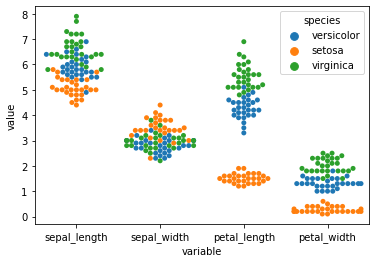

In [63]:
#step 3: The x-axis should be the variable name, the y-axis the measure. 
#Add another dimension using color to represent species. 
sns.swarmplot(data=train_melt, 
              x='variable', 
              y='value', 
              hue='species')

In [112]:
#step 4: Document takeaways
#Takeaways:
#Petal length and petal width are more accurate for determining species than sepal length and sepal width.
#Similar sepal widths
#maybe petal area and sepal area could be useful
#virginica iris have the largest petals
#setosa iris have the smallest petals
#setosa seem to have wide & short sepals

In [151]:
#Create 4 subplots (2 rows x 2 columns) of scatterplots.

#first, add sepal_area and petal_area to set up for subplots
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


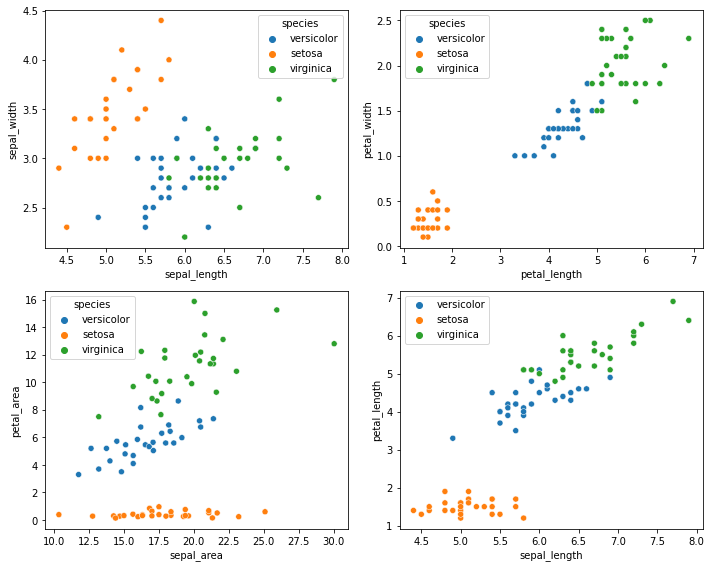

In [152]:
#next, plot the subplots

plt.figure(figsize=(10,8))

#sepal_length x sepal_width
plt.subplot(221)  #2 rows, 2 cols, 1st subplot
sns.scatterplot(x=train.sepal_length,y=train.sepal_width,hue=train.species)


#petal_length x petal_width
plt.subplot(222)  #2 rows, 2 cols, 2nd subplot
sns.scatterplot(x=train.petal_length,y=train.petal_width,hue=train.species)


#sepal_area x petal_area
plt.subplot(223)  #2 rows, 2 cols, 3rd subplot
sns.scatterplot(x=train.sepal_area,y=train.petal_area,hue=train.species)


#sepal_length x petal_length
plt.subplot(224)  #2 rows, 2 cols, 4th subplot
sns.scatterplot(x=train.sepal_length,y=train.petal_length,hue=train.species)

plt.legend()
plt.tight_layout()

#### What are your takeaways?
- setosa is more distinct than the other two flower species
- petal length vs width has the biggest disctinction for setosa
- sepal length is useful, there is division
- sepal width not great but likely adds some value (some division but not much)
- petal area is very useful (clear divisions)
- sepal area (not as much clear division)
- sepal_area-don't see much separation when we look at the 3rd plot in a hortizonal direction.
- Again, some value in sepal width, but not a ton.

In [153]:
#alternate to creating subplots
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):#loop through each subset and plot it
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

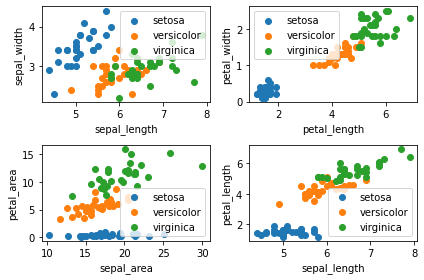

In [154]:
#subplots:
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.tight_layout()


In [64]:
#Create a heatmap of each variable layering correlation coefficient on top.

corr = train.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.154904,0.867976,0.824691
sepal_width,-0.154904,1.000000,-0.476228,-0.403306
petal_length,0.867976,-0.476228,1.000000,0.957345
petal_width,0.824691,-0.403306,0.957345,1.000000


<AxesSubplot:>

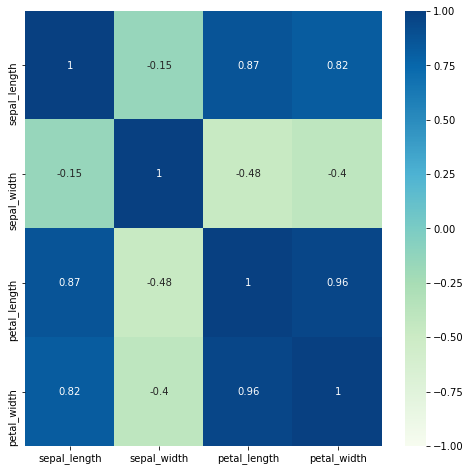

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            vmin=-1, #set min value for  color scale at -1.
            cmap='GnBu', #change default color 
#website for diff colors: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
            annot=True) #add annotations for each of the correlations

#### Note:
Do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.
#### Takeaways:
- most measures correlate with each other, the least is sepal_width with sepal_length @-.15.
- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)
- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)
- Little to no LINEAR correlation: sepal length & sepal width.

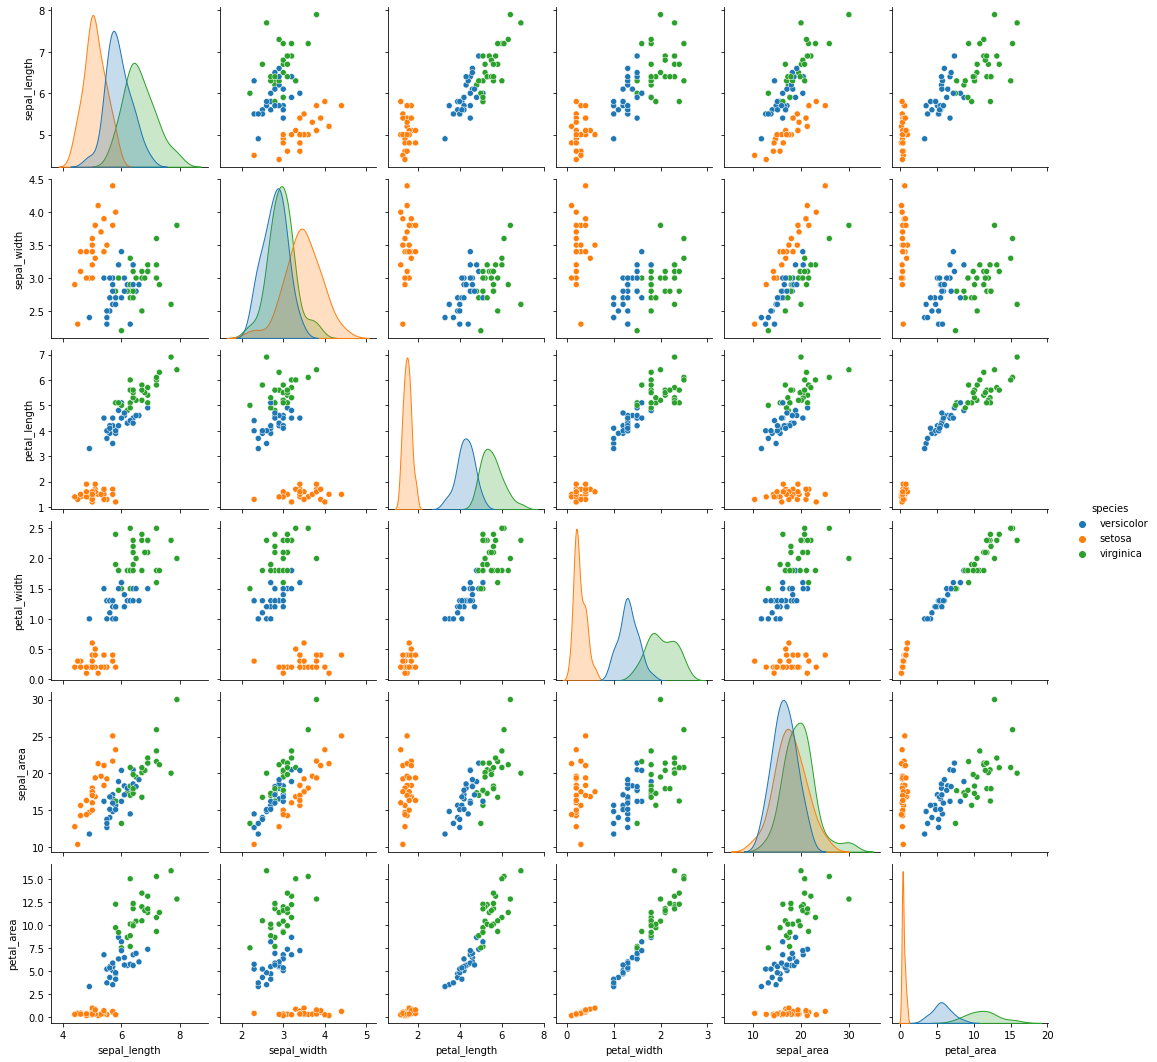

In [54]:
#Create a scatter matrix visualizing the interaction of each variable.

sns.pairplot(train, hue="species")

#### Takeaways:
- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine.
- petal area seems to show the largest separation between virginica & versicolor of all the individual features.
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
- virginica and versicolor show little to no difference when it comes to the width of the sepals.

In [156]:
#Is the sepal length significantly different in virginica compared to versicolor? 
#Run a statistical experiment to test this. (2-sample, 2-tailed)

#Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
null_hypothesis = "there is no difference in sepal length between virginica and versicolor"
alternative_hypothesis = "sepal length is significantly different in virginica compared to versicolor"
alpha = .05

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [157]:
versicolor_sepal = versicolor.sepal_length
virginica_sepal = virginica.sepal_length

In [158]:
from scipy import stats

In [159]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(virginica_sepal, versicolor_sepal)

t, p

(5.656491804882077, 6.024259917536193e-07)

In [160]:
#What is your takeaway from this statistical testing?

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that there is no difference in sepal length between virginica and versicolor
We accept that sepal length is significantly different in virginica compared to versicolor


In [ ]:
#above takeaway means it is useful to use sepal length
#sepal length would be a good feature
#another way to look at test below:

#### Test
We want to compare mean sepal length of the 2 different species. Therefore, a t-test or Mann-Whitney test will be useful. Mann-Whitney is the non-parametric version of the t-test. That means that if your data does not meet the necessary assumptions for a t-test, you can use the Mann-Whitney test. You can use it exactly the same as you would the t-test. It is just a different method to call from scipy.stats.

#### Assumptions
- Assumptions are met and we will use an independent t-test.
- Looking at the histograms, distribution appears normal.
- Looking at the histograms, variance appears mostly equal.
- We know that versicolor flowers and virginica flowers are independent and separate 

#### Hypothesis
- alpha = .05
- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.
- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$.

In [161]:
import scipy.stats as stats

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [162]:
# looks normal on histogram, and mean and median are very close. 
# We can assume normality with minimal risk. 

train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [92]:
# variances are close. 
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.283425925925926, 0.18109788359788362)

In [163]:
#check the t-statistic and p-value and check yourself if p is < alpha
stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length)

Ttest_indResult(statistic=5.656491804882077, pvalue=6.024259917536193e-07)

In [164]:
#or do below:
t, p = stats.ttest_ind(virginica_sepal, versicolor_sepal)

t, p

(5.656491804882077, 6.024259917536193e-07)

In [165]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that there is no difference in sepal length between virginica and versicolor
We accept that sepal length is significantly different in virginica compared to versicolor


#### Conclusion
We reject $H_0$ that the sepal length is the same for both groups. 
- Takeaway: 
Sepal length will be a useful feature.

In [166]:
#Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

#Pearson's R correlation test
virginica = train[train.species == 'virginica'].sepal_length
versicolor = train[train.species == 'versicolor'].sepal_length

In [167]:
r, p = stats.pearsonr(virginica, versicolor)
r, p

(0.12955644787553267, 0.5111354634944449)

In [168]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")
    print("No linear relationship in sepal length between versicolor and virginica.")

We failed to reject the hypothesis
No linear relationship in sepal length between versicolor and virginica.
